First few rows of the dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            3734

/tmp/ipython-input-1-619393066.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-1-619393066.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

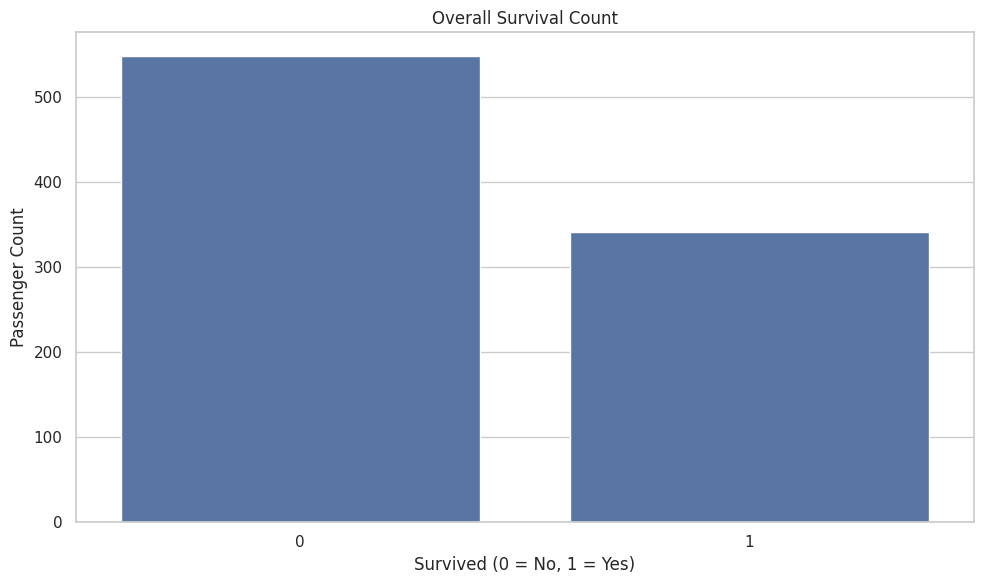

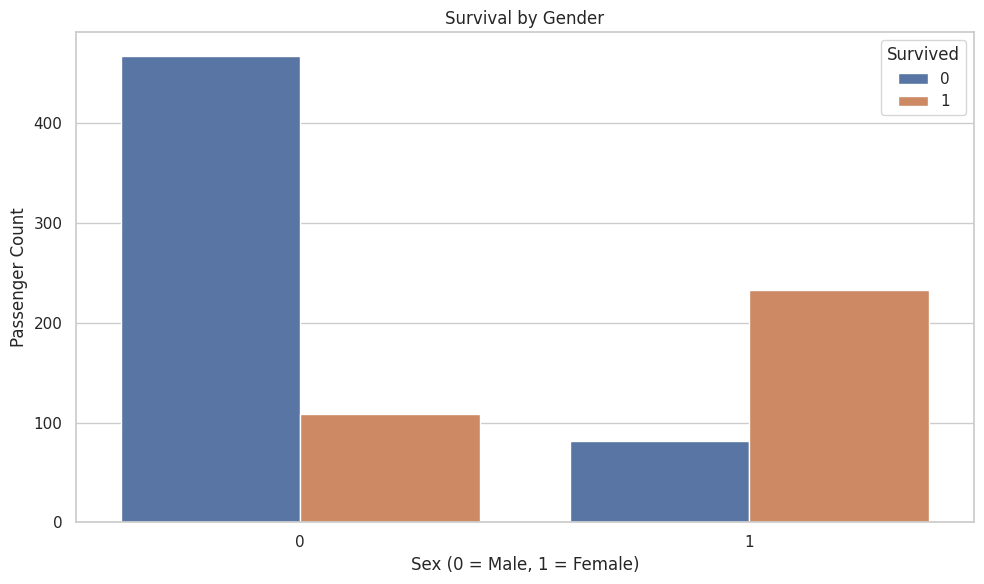

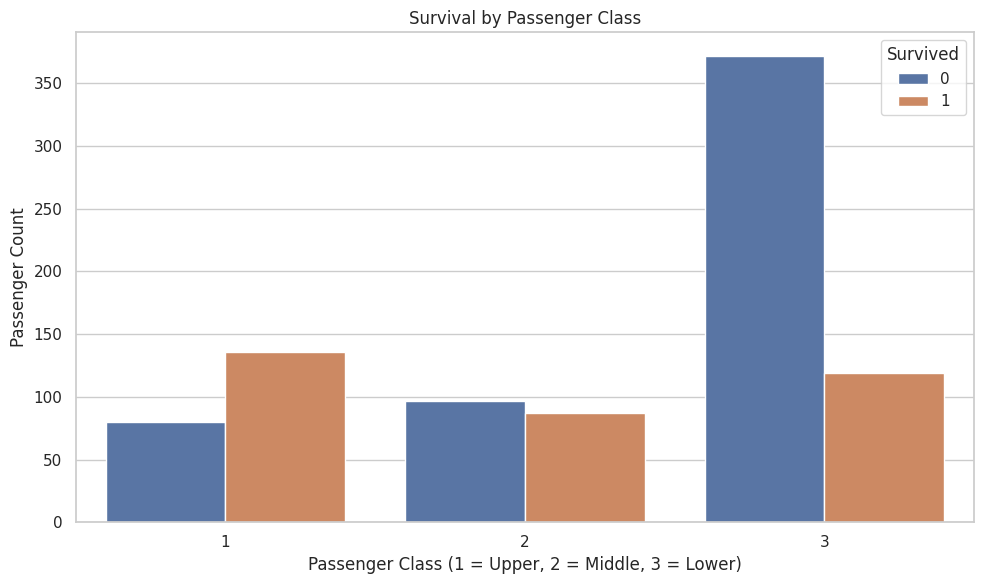

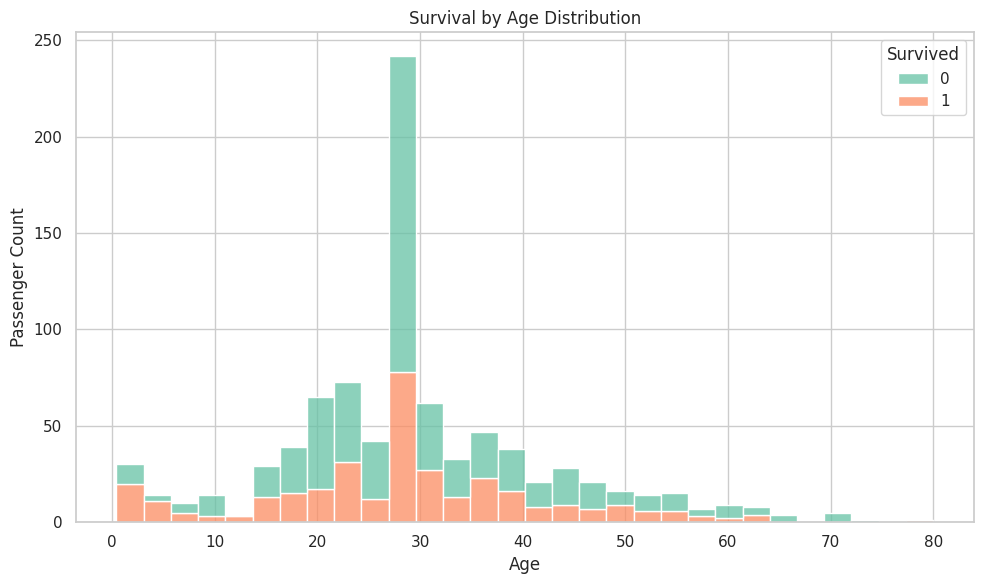

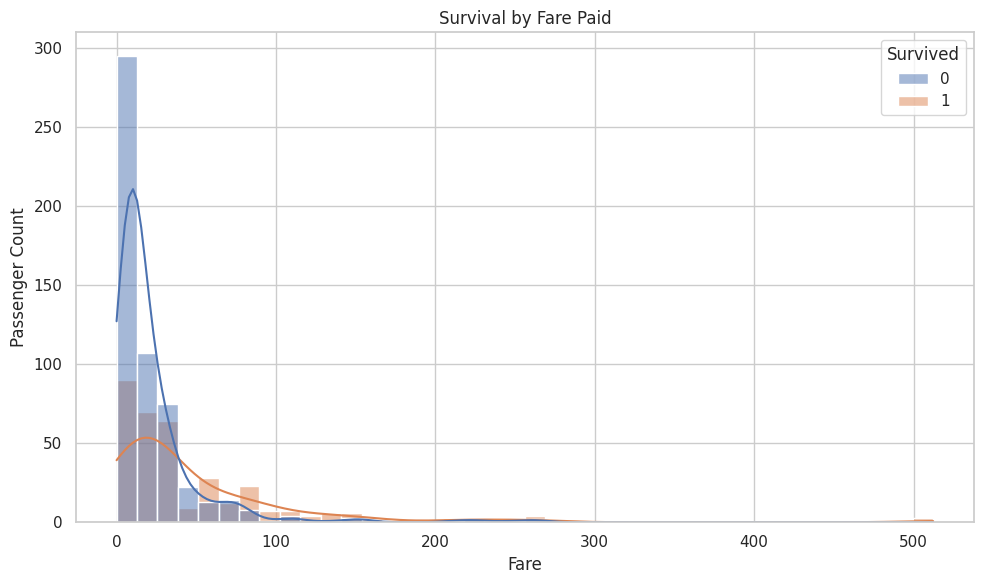

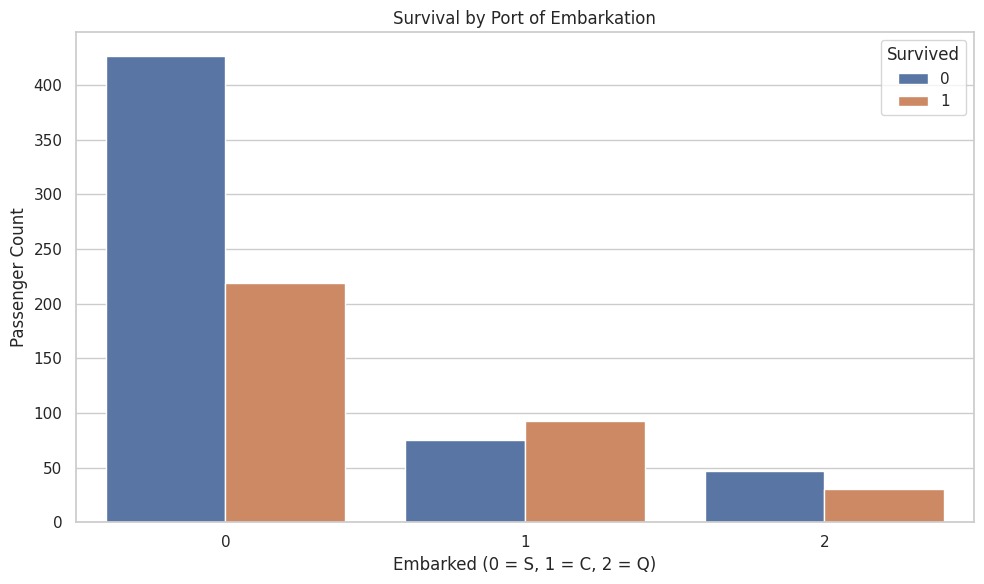

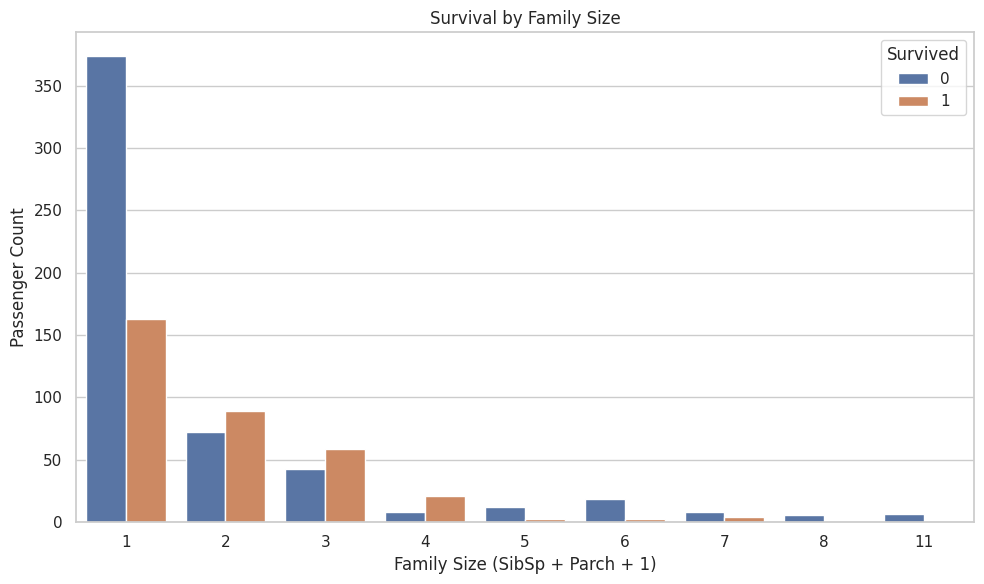

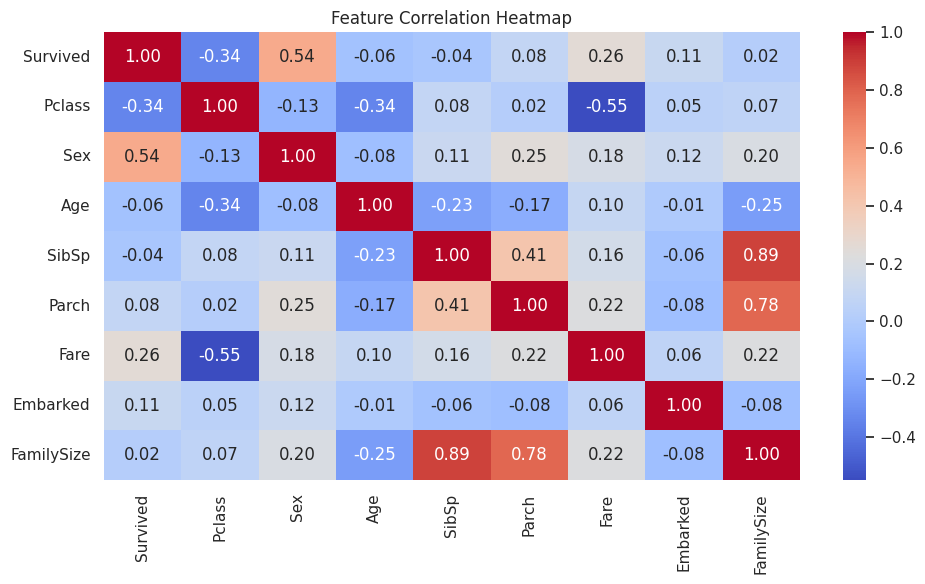

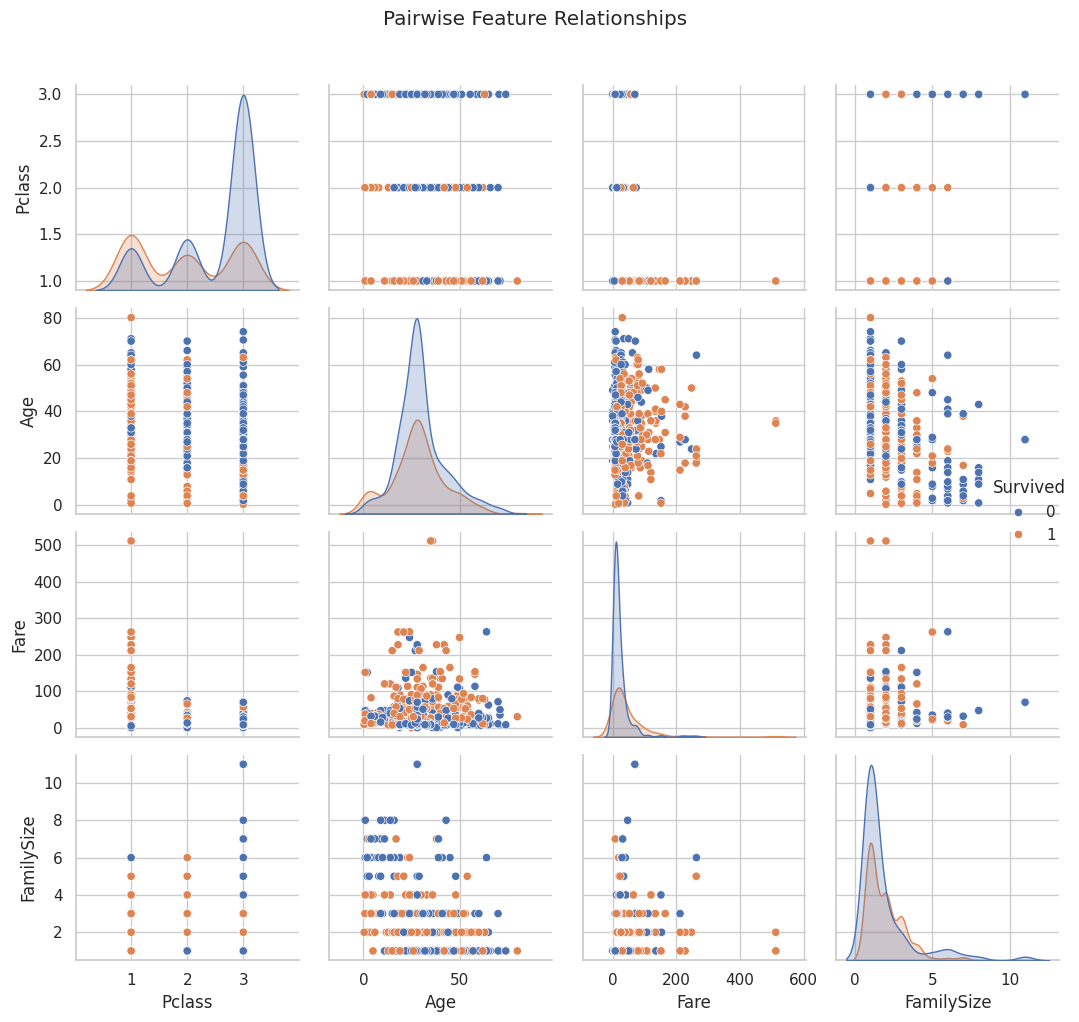


Summary:

- Females had significantly higher survival rates than males.
- Passengers in 1st class were more likely to survive.
- Younger passengers (especially children) had better survival chances.
- Higher fares (associated with higher class) correlated with survival.
- Embarkation from port C showed higher survival, likely due to class distribution.
- Passengers with medium-sized families (2–4 people) had better survival odds.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual theme for plots
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Load the dataset
df = pd.read_csv("train.csv")

# Preview the dataset
print("First few rows of the dataset:")
print(df.head())

# Basic structure and missing values
print("\nDataset Info:")
df.info()

print("\nMissing values in each column:")
print(df.isnull().sum())

# Drop columns that are unlikely to help with survival prediction
df.drop(columns=['Cabin', 'Ticket', 'Name', 'PassengerId'], inplace=True)

# Fill missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Encode categorical columns for analysis
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Create a new feature: Family Size
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Exploratory Data Analysis

# 1. Survival count
sns.countplot(data=df, x='Survived')
plt.title('Overall Survival Count')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Passenger Count')
plt.tight_layout()
plt.show()

# 2. Survival by Gender
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title('Survival by Gender')
plt.xlabel('Sex (0 = Male, 1 = Female)')
plt.ylabel('Passenger Count')
plt.tight_layout()
plt.show()

# 3. Survival by Passenger Class
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title('Survival by Passenger Class')
plt.xlabel('Passenger Class (1 = Upper, 2 = Middle, 3 = Lower)')
plt.ylabel('Passenger Count')
plt.tight_layout()
plt.show()

# 4. Age distribution by survival
sns.histplot(data=df, x='Age', hue='Survived', bins=30, multiple='stack', palette='Set2')
plt.title('Survival by Age Distribution')
plt.xlabel('Age')
plt.ylabel('Passenger Count')
plt.tight_layout()
plt.show()

# 5. Fare distribution by survival
sns.histplot(data=df, x='Fare', hue='Survived', bins=40, kde=True)
plt.title('Survival by Fare Paid')
plt.xlabel('Fare')
plt.ylabel('Passenger Count')
plt.tight_layout()
plt.show()

# 6. Survival by Embarked Port
sns.countplot(data=df, x='Embarked', hue='Survived')
plt.title('Survival by Port of Embarkation')
plt.xlabel('Embarked (0 = S, 1 = C, 2 = Q)')
plt.ylabel('Passenger Count')
plt.tight_layout()
plt.show()

# 7. Survival by Family Size
sns.countplot(data=df, x='FamilySize', hue='Survived')
plt.title('Survival by Family Size')
plt.xlabel('Family Size (SibSp + Parch + 1)')
plt.ylabel('Passenger Count')
plt.tight_layout()
plt.show()

# 8. Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

# 9. Pairwise Relationships (optional but insightful)
sns.pairplot(df[['Survived', 'Pclass', 'Age', 'Fare', 'FamilySize']], hue='Survived', diag_kind='kde')
plt.suptitle("Pairwise Feature Relationships", y=1.02)
plt.tight_layout()
plt.show()

# Summary

print("\nSummary:")
print("""
- Females had significantly higher survival rates than males.
- Passengers in 1st class were more likely to survive.
- Younger passengers (especially children) had better survival chances.
- Higher fares (associated with higher class) correlated with survival.
- Embarkation from port C showed higher survival, likely due to class distribution.
- Passengers with medium-sized families (2–4 people) had better survival odds.
""")
